## Importing the Dependences

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [41]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


### Loading Breast Cancer from sklearn Library

In [6]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

#### Converting the data set in the table format

In [7]:
breast_cancer = pd.DataFrame(breast_cancer_dataset.data ,columns = breast_cancer_dataset.feature_names)
breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Adding the target value to the Table

In [8]:
breast_cancer['target']= breast_cancer_dataset.target
breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Data preprocessing

In [9]:
breast_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [10]:
breast_cancer.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1


In [11]:
breast_cancer.shape

(569, 31)

In [12]:
breast_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [13]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
breast_cancer.groupby(breast_cancer['target']).mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [16]:
breast_cancer.value_counts('target')

target
1    357
0    212
Name: count, dtype: int64

In [17]:
breast_cancer.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


### Correlation 

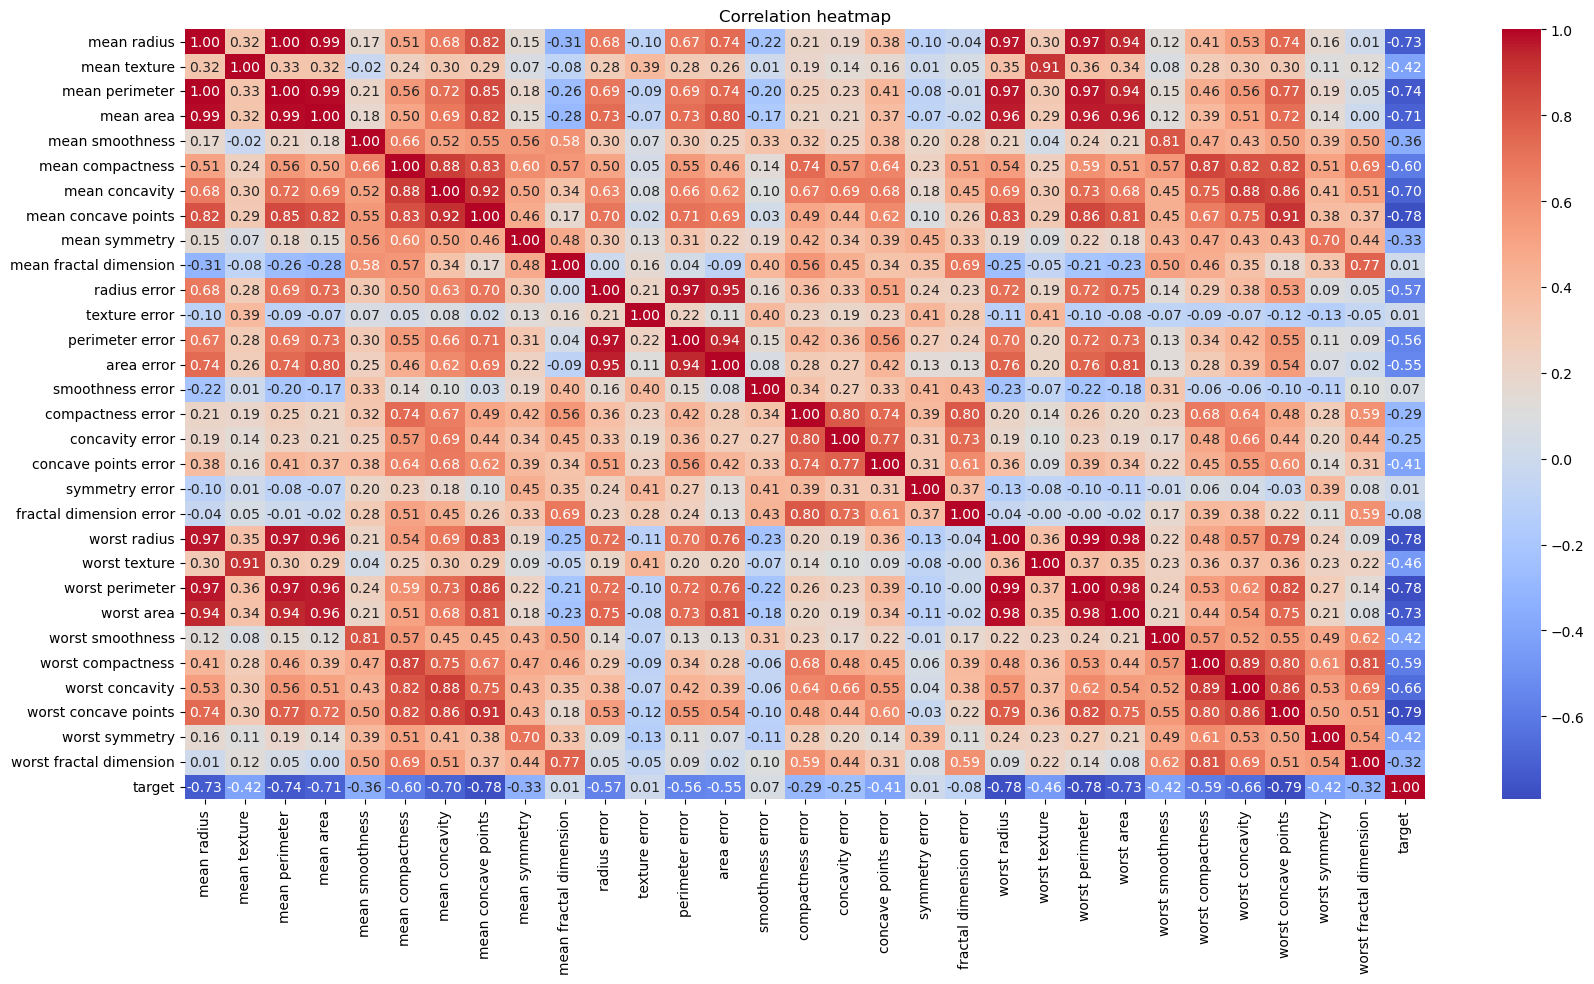

In [18]:
plt.figure(figsize =(20,10))
sns.heatmap(breast_cancer.corr(),annot=True ,cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [19]:
X = breast_cancer.drop(columns = 'target')
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
Scaler = StandardScaler()
X_standardization = Scaler.fit_transform(X)
X = X_standardization
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [21]:
Y = breast_cancer['target']
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

### Spliting the data 

##### Hyperparameter Tunning

In [22]:
model = SVC()

In [23]:
parameters = {
              'kernel':['linear','poly','rbf','sigmod'],
               'C':[1,5,10,20]
}

In [24]:
## hyper paramter tuning using Grid Search
classifier = GridSearchCV(model,parameters,cv=10)

# fitting the X AND Y Value in Grid SearchCV
classifier.fit(X,Y)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packages

,estimator,SVC()
,param_grid,"{'C': [1, 5, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,5


In [25]:
classifier.cv_results_

{'mean_fit_time': array([0.01281087, 0.00623045, 0.01621978, 0.00147927, 0.01121137,
        0.00826418, 0.0083288 , 0.00103559, 0.01264505, 0.00761249,
        0.00799024, 0.00116282, 0.01761625, 0.0078202 , 0.00894058,
        0.00059946]),
 'std_fit_time': array([0.00454806, 0.00595661, 0.00970547, 0.00068754, 0.00511022,
        0.00481841, 0.00580809, 0.00045945, 0.00536182, 0.00510852,
        0.00728907, 0.00055929, 0.00638804, 0.00553925, 0.0060396 ,
        0.00048945]),
 'mean_score_time': array([0.00371385, 0.00266263, 0.00320125, 0.        , 0.00112824,
        0.00229771, 0.00286031, 0.        , 0.00125034, 0.00292337,
        0.002966  , 0.        , 0.00189104, 0.00317609, 0.00145929,
        0.        ]),
 'std_score_time': array([0.00283926, 0.00445279, 0.00464438, 0.        , 0.00135237,
        0.00163822, 0.00481784, 0.        , 0.00102601, 0.0029951 ,
        0.00450851, 0.        , 0.00144272, 0.0030117 , 0.00195975,
        0.        ]),
 'param_C': masked_array(d

In [26]:
best_parameters = classifier.best_params_
best_parameters

{'C': 5, 'kernel': 'rbf'}

In [27]:
highest_accuarcy = classifier.best_score_
highest_accuarcy 

0.9788847117794484

In [28]:
Result = pd.DataFrame(classifier.cv_results_)
Result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012811,0.004548,0.003714,0.002839,1,linear,"{'C': 1, 'kernel': 'linear'}",0.964912,0.964912,0.982456,0.982456,0.982456,0.982456,0.929825,1.000000,1.000000,0.964286,0.975376,0.019571,3
1,0.006230,0.005957,0.002663,0.004453,1,poly,"{'C': 1, 'kernel': 'poly'}",0.947368,0.842105,0.877193,0.877193,0.877193,0.929825,0.894737,0.912281,0.947368,0.928571,0.903383,0.033421,12
2,0.016220,0.009705,0.003201,0.004644,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.982456,0.964912,0.947368,0.982456,1.000000,1.000000,0.947368,1.000000,1.000000,0.946429,0.977099,0.022388,2
3,0.001479,0.000688,0.000000,0.000000,1,sigmod,"{'C': 1, 'kernel': 'sigmod'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
4,0.011211,0.005110,0.001128,0.001352,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.964912,0.964912,0.964912,0.947368,0.964912,0.964912,0.982456,1.000000,0.982143,0.968390,0.015266,6
5,0.008264,0.004818,0.002298,0.001638,5,poly,"{'C': 5, 'kernel': 'poly'}",0.964912,0.894737,0.929825,0.894737,0.929825,0.964912,0.947368,0.964912,0.982456,0.964286,0.943797,0.029101,11
6,0.008329,0.005808,0.002860,0.004818,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.982456,0.964912,0.964912,0.982456,1.000000,0.982456,0.947368,1.000000,1.000000,0.964286,0.978885,0.017242,1
7,0.001036,0.000459,0.000000,0.000000,5,sigmod,"{'C': 5, 'kernel': 'sigmod'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
8,0.012645,0.005362,0.001250,0.001026,10,linear,"{'C': 10, 'kernel': 'linear'}",0.947368,0.982456,0.964912,0.947368,0.964912,0.964912,0.964912,0.982456,1.000000,0.982143,0.970144,0.015765,5
9,0.007612,0.005109,0.002923,0.002995,10,poly,"{'C': 10, 'kernel': 'poly'}",1.000000,0.929825,0.929825,0.912281,0.982456,0.964912,0.947368,0.964912,0.982456,0.964286,0.957832,0.026241,10


In [29]:
Grid_search_cv = Result[['param_C','param_kernel','mean_test_score']]
Grid_search_cv

,param_C,param_kernel,mean_test_score
0,1,linear,0.975376
1,1,poly,0.903383
2,1,rbf,0.977099
3,1,sigmod,NaN
4,5,linear,0.968390
5,5,poly,0.943797
6,5,rbf,0.978885
7,5,sigmod,NaN
8,10,linear,0.970144
9,10,poly,0.957832


### Spilting the data into Train ,Test Split

In [30]:
X_train ,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2, stratify =Y,random_state =2)
X_train ,X_test,Y_train,Y_test

(array([[ 1.99738898,  0.87273197,  1.86307257, ...,  1.3139606 ,
         -0.12740946, -0.48133166],
        [-0.5530585 , -1.21232018, -0.60627993, ..., -1.46306623,
         -0.98321541, -1.30647318],
        [-0.74618815, -0.19539184, -0.76980503, ..., -0.74863429,
         -0.26006747, -1.05710201],
        ...,
        [-0.5871402 , -0.09067382, -0.63058215, ..., -0.96957221,
         -0.03357819, -0.17266556],
        [ 0.56879758,  0.32354413,  0.66443774, ...,  1.41141082,
          1.3027086 ,  1.67656027],
        [ 0.55175672,  0.08385621,  0.49967694, ...,  0.56937998,
         -0.40566773, -1.11251782]]),
 array([[ 0.46087218,  0.22348024,  0.43789164, ...,  0.50695093,
          1.76701163,  1.24431689],
        [-0.40537112, -1.65679   , -0.45675951, ..., -0.49282745,
         -0.20344515,  0.59262688],
        [-0.26336402, -0.43275269, -0.32289136, ..., -0.98830093,
         -0.2163874 , -0.66309554],
        ...,
        [ 0.21946012,  0.75405154,  0.41729654, ...,  

In [31]:
print(X.shape,X_train.shape,X_test.shape)


(569, 30) (455, 30) (114, 30)


### Model Training

In [32]:
model1 = SVC(kernel ='rbf',C = 5)
model1.fit(X_train,Y_train)

,C,5
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


####  Model Evalution

#### Training Data model Evaluation

In [33]:
X_train_prediction = model1.predict(X_train)
X_train_accuracy_score = accuracy_score(Y_train,X_train_prediction)
X_train_accuracy_score = X_train_accuracy_score * 100
print("The accuracy_score of training Data ",X_train_accuracy_score)

The accuracy_score of training Data  99.12087912087912


#### Test Data model Evaluation

In [34]:
X_test_prediction = model1.predict(X_test)
X_test_accuracy_score = accuracy_score(Y_test,X_test_prediction)
X_test_accuracy_score = X_test_accuracy_score * 100
print("The accuracy_score of training Data ",X_test_accuracy_score)

The accuracy_score of training Data  98.24561403508771


### Prediction For unknown Data

In [35]:
input_data = ([19.81,22.15,130.0,1260.0,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398.0,0.1512,0.315,0.5372,0.2388,0.2768,0.07615])
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)
input_data_Standardized = Scaler.transform(input_data_reshape)
Prediction = model1.predict(input_data_Standardized)
if(Prediction[0] == 0):
    print("you breast  cancer is Maligent")
else:
    print("you breast cancer is Benign")

you breast  cancer is Maligent


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Saving the trained Model

In [61]:
import pickle

In [62]:
#filename = 'trained_model.sav'
#pickle.dump(model1,open(filename,'wb'))   # wb write binary as cancer or no ,model1 is the predicted class saved variable 

In [63]:
filename_2 = 'trained_model_with_scaler_1.sav'
pickle.dump({'model':model1,'scaler':Scaler},open(filename_2,'wb'))

In [64]:
### lOADING THE SAVED MODEL
loaded_model = pickle.load(open('trained_model_with_scaler_1.sav','rb')) #3 rb read binary file
model = loaded_model['model']
scaler = loaded_model['scaler']

In [65]:
input_data = ([19.81,22.15,130.0,1260.0,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.4,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398.0,0.1512,0.315,0.5372,0.2388,0.2768,0.07615])
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)
input_data_Standardized = scaler.transform(input_data_reshape)
Prediction =model.predict(input_data_Standardized)
if(Prediction[0] == 0):
    print("you breast  cancer is Maligent")
else:
    print("you breast cancer is Benign")

you breast  cancer is Maligent


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
